<a href="https://colab.research.google.com/github/abdinegara783/ML-Mentoring-Platform-Dicoding/blob/main/Recommender_System_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd

In [ ]:
mentor=pd.read_csv('mentors.csv')
mentor.head(5)

,name,company,user_headline,review_at,occupation,last_education,profile
0,Abdan Zaki Alifian,"PT. Bank MNC Internasional, Tbk.",External Code Reviewer at Dicoding Indonesia,Belajar Membuat Aplikasi Android untuk Pemula\...,Android Developer,NaN,<ul><li>Bangkit Graduate 2021 - Android Learni...
1,Abdul Chathil,University of Muhammadiyah Malang,Mobile Developer at Bhinneka.com,Memulai Pemrograman Dengan Swift,Pelajar/Mahasiswa,DIPLOMA_IV_OR_STRATA_I,<ul><li>Associate Android Developer</li><li>Mo...
2,Abdul Malik,SMK Media Informatika,Self-employed,Menjadi React Web Developer Expert\nBelajar Me...,Belum/Tidak Bekerja,DIPLOMA_IV_OR_STRATA_I,<p>A self-taught <strong>Frontend Developer</s...
3,Abraham Bulyan Zebua,Pharmaniaga,make something from nothing,Belajar Membuat Aplikasi Android untuk Pemula\...,Android Developer,DIPLOMA_IV_OR_STRATA_I,<p>I love design and make new things especiall...
4,Abrar Wiryawan,Universitas Negeri Jakarta,External Code Reviewer at Dicoding Indonesia,Belajar Membuat Aplikasi Android untuk Pemula\...,Pelajar/Mahasiswa,DIPLOMA_IV_OR_STRATA_I,<ul><li>Android Enthusiast</li><li>Kotlin Enth...


In [ ]:
mentor['occupation'].unique()

array(['Android Developer', 'Pelajar/Mahasiswa', 'Belum/Tidak Bekerja',
       'Wirausaha/Entrepreneur/Founder', 'Peneliti',
       'Front-End Developer', 'Data Scientist', 'Programmer',
       'Mobile Apps Developer', 'Software Engineer', 'Karyawan Swasta',
       'Lainnya', 'Dosen', 'DevOps', 'Back-End Developer',
       'Full-Stack Developer', 'Chief Technical Officers (CTO)',
       'Web Engineer', 'UI/UX Designer', 'Web Developer',
       'Cloud Engineer', 'Data Engineer', 'Pekerja Lepas / Freelance',
       'Karyawan Honorer', 'Guru', 'Pegawai Negeri Sipil',
       'Quality Assurance (QA)', 'Data Analyst',
       'Chief Information Officers (CIO)', 'Konsultan'], dtype=object)

In [ ]:
mentees=pd.read_csv('mentees.csv')
mentees.head(5)

,Name,course_enrolled,course_graduated
0,hafizhan shidqi,Belajar Membangun LINE Chatbot,Belajar Membangun LINE Chatbot
1,gandhi wibowo,Belajar Membuat Aplikasi Android untuk Pemula\...,"Belajar Membuat Aplikasi Android untuk Pemula,..."
2,aldio mahendra purwandrarto,Belajar Membuat Augmented Reality,Belajar Membuat Augmented Reality
3,benny putra,Menjadi Azure Cloud Developer,Menjadi Azure Cloud Developer
4,vicky vernando dasta,Belajar Membangun LINE Chatbot\nBelajar Dasar ...,"Belajar Membangun LINE Chatbot,Belajar Dasar P..."


# Preprocessing Data Mentor

In [ ]:
from bs4 import BeautifulSoup

def remove_html_tags(data, column):
    data[column] = data[column].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if isinstance(x, str) else x)
    return data

# Mengisi nilai NaN dengan string kosong
mentor['profile'] = mentor['profile'].fillna('')

# Memanggil fungsi untuk menghilangkan tag HTML pada kolom "profile"
mentor = remove_html_tags(mentor, 'profile')

# Menampilkan hasil
print(mentor)


                        name                            company  \
0         Abdan Zaki Alifian   PT. Bank MNC Internasional, Tbk.   
1              Abdul Chathil  University of Muhammadiyah Malang   
2                Abdul Malik              SMK Media Informatika   
3       Abraham Bulyan Zebua                        Pharmaniaga   
4             Abrar Wiryawan         Universitas Negeri Jakarta   
..                       ...                                ...   
158  Yusril Adriansyah Putra        Universitas Negeri Surabaya   
159             Yusuf Fazeri                         Karyakarsa   
160   Zanuar Ekaputra Rus'an                 Dicoding Indonesia   
161       Zidni Rif'an Ifana      PT Solusi Konvergen Indonesia   
162        Zulfikar Mauludin                                BWA   

                                         user_headline  \
0         External Code Reviewer at Dicoding Indonesia   
1                     Mobile Developer at Bhinneka.com   
2                    

<ipython-input-16-8d7b7fb6e3f5>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data[column] = data[column].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if isinstance(x, str) else x)


In [ ]:
mentor

,name,company,user_headline,review_at,occupation,last_education,profile
0,Abdan Zaki Alifian,"PT. Bank MNC Internasional, Tbk.",External Code Reviewer at Dicoding Indonesia,Belajar Membuat Aplikasi Android untuk Pemula\...,Android Developer,NaN,Bangkit Graduate 2021 - Android Learning Path ...
1,Abdul Chathil,University of Muhammadiyah Malang,Mobile Developer at Bhinneka.com,Memulai Pemrograman Dengan Swift,Pelajar/Mahasiswa,DIPLOMA_IV_OR_STRATA_I,Associate Android Developer Mobile Enthusiast ...
2,Abdul Malik,SMK Media Informatika,Self-employed,Menjadi React Web Developer Expert\nBelajar Me...,Belum/Tidak Bekerja,DIPLOMA_IV_OR_STRATA_I,A self-taught Frontend Developer with a passio...
3,Abraham Bulyan Zebua,Pharmaniaga,make something from nothing,Belajar Membuat Aplikasi Android untuk Pemula\...,Android Developer,DIPLOMA_IV_OR_STRATA_I,I love design and make new things especially f...
4,Abrar Wiryawan,Universitas Negeri Jakarta,External Code Reviewer at Dicoding Indonesia,Belajar Membuat Aplikasi Android untuk Pemula\...,Pelajar/Mahasiswa,DIPLOMA_IV_OR_STRATA_I,Android Enthusiast Kotlin Enthusiast Jetpack C...
...,...,...,...,...,...,...,...
158,Yusril Adriansyah Putra,Universitas Negeri Surabaya,External Code Reviewer at Dicoding Indonesia,Menjadi Front-End Web Developer Expert\nBelaja...,Back-End Developer,DIPLOMA_IV_OR_STRATA_I,Front-End Web Developer Back-End Web Developer...
159,Yusuf Fazeri,Karyakarsa,Instructor at Codepolitan,Belajar Membuat Website untuk Menjadi Desainer...,Web Developer,DIPLOMA_IV_OR_STRATA_I,Sering terlibat dalam pelatihan sebagai mentor...
160,Zanuar Ekaputra Rus'an,Dicoding Indonesia,"Software Engineer, Reviewer at Dicoding Indonesia",Belajar Pengembangan Machine Learning\nBelajar...,Software Engineer,DIPLOMA_IV_OR_STRATA_I,Multi-stack Engineer. Certified TensorFlow Dev...
161,Zidni Rif'an Ifana,PT Solusi Konvergen Indonesia,External Code Reviewer at Dicoding Indonesia,Belajar Fundamental Aplikasi Back-End\nBelajar...,Back-End Developer,DIPLOMA_IV_OR_STRATA_I,Backend Developer


In [ ]:
def check_missing_values(data):
    missing_values = data.isnull().sum()
    total_values = data.shape[0]
    missing_percentage = (missing_values / total_values) * 100

    missing_data = pd.DataFrame({
        'Missing Values': missing_values,
        'Total Values': total_values,
        'Missing Percentage': missing_percentage
    })

    return missing_data

# Contoh penggunaan
missing_data = check_missing_values(mentor)
print(missing_data)


                Missing Values  Total Values  Missing Percentage
name                         0           163            0.000000
company                      2           163            1.226994
user_headline               13           163            7.975460
review_at                    0           163            0.000000
occupation                   0           163            0.000000
last_education               2           163            1.226994
profile                     14           163            8.588957


In [ ]:
import pandas as pd

def get_missing_values(data):
    missing_columns = data.columns[data.isnull().any()].tolist()
    missing_rows = data[data.isnull().any(axis=1)]

    return missing_columns, missing_rows

# Contoh penggunaan
missing_columns, missing_rows = get_missing_values(mentor)
print("Columns with missing values:", missing_columns)
print("\nRows with missing values:")
print(missing_rows)


Columns with missing values: ['company', 'user_headline', 'last_education', 'profile']

Rows with missing values:
                                 name  \
0                  Abdan Zaki Alifian   
5                    Adam Ardisasmita   
8                 Aditya Dyan Nugraha   
22               Amril Hakim Sihotang   
23                 Ananda Dwi Prayoga   
38                  Celvine Adi Putra   
50         Eko Junirianto,S.Kom, M.Cs   
53                     Faisal Susanto   
62             GALIH INDRA FIRMANSYAH   
65   Gusti Muhammad Aulia Nur Sulthan   
77                      Kamal Mahmudi   
81         Khrisna Indrawan Eka Putra   
92                      Moh Sihabudin   
100   Muhammad Hadi Selamet Hariyanto   
102              Muhammad Ilham Adhim   
107                      Nadya Latifa   
109                    Nanang Sutisna   
111            Ni Luh Putu Anita Dewi   
112              Ni Made Yuli Cahyani   
113                              Nico   
123                  Rama

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


df_mentors = pd.DataFrame(mentor['profile'])

# Data Labels
labels = {
    'category': ['Android Developer', 'Cloud Computing Developer', 'Machine Learning Developer'],
    'keywords': [
        ['android', 'app', 'mobile', 'kotlin'],
        ['cloud', 'azure'],
        ['machine learning', 'data science']
    ]
}

df_labels = pd.DataFrame(labels)

# Data Preprocessing
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_labels['keywords'].apply(' '.join))
y = df_labels['category']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Classification
X_mentors = vectorizer.transform(mentor['profile'])
predicted_labels = classifier.predict(X_mentors)

# Add predicted labels to mentors data
df_mentors['predicted_category'] = predicted_labels

# Display the mentors data with predicted labels
print(df_mentors)

                                               profile  \
0    Bangkit Graduate 2021 - Android Learning Path ...   
1    Associate Android Developer Mobile Enthusiast ...   
2    A self-taught Frontend Developer with a passio...   
3    I love design and make new things especially f...   
4    Android Enthusiast Kotlin Enthusiast Jetpack C...   
..                                                 ...   
158  Front-End Web Developer Back-End Web Developer...   
159  Sering terlibat dalam pelatihan sebagai mentor...   
160  Multi-stack Engineer. Certified TensorFlow Dev...   
161                                  Backend Developer   
162                Android Developer Dicoding Graduate   

             predicted_category  
0     Cloud Computing Developer  
1     Cloud Computing Developer  
2    Machine Learning Developer  
3     Cloud Computing Developer  
4     Cloud Computing Developer  
..                          ...  
158   Cloud Computing Developer  
159   Cloud Computing Developer

In [ ]:
df_mentors

,profile,predicted_category
0,Bangkit Graduate 2021 - Android Learning Path ...,Cloud Computing Developer
1,Associate Android Developer Mobile Enthusiast ...,Cloud Computing Developer
2,A self-taught Frontend Developer with a passio...,Machine Learning Developer
3,I love design and make new things especially f...,Cloud Computing Developer
4,Android Enthusiast Kotlin Enthusiast Jetpack C...,Cloud Computing Developer
...,...,...
158,Front-End Web Developer Back-End Web Developer...,Cloud Computing Developer
159,Sering terlibat dalam pelatihan sebagai mentor...,Cloud Computing Developer
160,Multi-stack Engineer. Certified TensorFlow Dev...,Cloud Computing Developer
161,Backend Developer,Cloud Computing Developer


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data Mentors
data_mentors = {
    'name': ['Abdan Zaki Alifian', 'Abdul Chathil', 'Abdul Malik'],
    'text_features': [
        'Belajar Membuat Aplikasi Android untuk Pemula Belajar Fundamental Aplikasi Flutter Menjadi Android Developer Expert Belajar Fundamental Aplikasi Android Memulai Pemrograman Dengan Kotlin Belajar Pengembangan Aplikasi Android Intermediate Android Developer NaN Bangkit Graduate 2021 - Android Learning Path Dicoding Graduate - Android Development Android Developer at PT Bank MNC Internasional Tbk. Kotlin Enthusiast',
        'Mobile Developer at Bhinneka.com Memulai Pemrograman Dengan Swift Pelajar/Mahasiswa DIPLOMA_IV_OR_STRATA_I Associate Android Developer Mobile Enthusiast Dicoding Graduate',
        'Self-employed Menjadi React Web Developer Expert Belajar Membuat Aplikasi Web dengan React Belajar Membuat Front-End Web untuk Pemula Belajar Fundamental Front-End Web Development Belum/Tidak Bekerja DIPLOMA_IV_OR_STRATA_I A self-taught Frontend Developer with a passion for building user-friendly and efficient websites. My recent learning in Frontend web development has equipped me with a solid foundation in'
    ]
}

df_mentors = pd.DataFrame(data_mentors)

# Data Mentees
data_mentees = {
    'name': ['hafizhan shidqi', 'gandhi wibowo', 'aldio mahendra purwandrarto', 'benny putra', 'vicky vernando dasta'],
    'text_features': [
        'Belajar Membangun LINE Chatbot',
        'Belajar Membuat Aplikasi Android untuk Pemula Menjadi Azure Cloud Developer Memulai Pemrograman Dengan Swift Belajar Prinsip Pemrograman SOLID',
        'Belajar Membuat Augmented Reality',
        'Menjadi Azure Cloud Developer',
        'Belajar Membangun LINE Chatbot Belajar Dasar Pemrograman Web'
    ]
}

df_mentees = pd.DataFrame(data_mentees)

# Reset Index
df_mentors = df_mentors.reset_index(drop=True)
df_mentees = df_mentees.reset_index(drop=True)

# Data Preprocessing
df_mentors['text_features'] = df_mentors['text_features'].str.lower()
df_mentors['text_features'] = df_mentors['text_features'].str.replace(r'[^\w\s]', '')
df_mentees['text_features'] = df_mentees['text_features'].str.lower()
df_mentees['text_features'] = df_mentees['text_features'].str.replace(r'[^\w\s]', '')

# Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer()
tfidf_matrix_mentors = vectorizer.fit_transform(df_mentors['text_features'])
tfidf_matrix_mentees = vectorizer.transform(df_mentees['text_features'])

# Similarity Calculation (Cosine Similarity)
similarity_matrix = cosine_similarity(tfidf_matrix_mentees, tfidf_matrix_mentors)

# Match Mentors with Mentees
mentees_indices = range(len(df_mentees))
mentors_indices = similarity_matrix.argmax(axis=1)
matched_data = pd.DataFrame(columns=['mentee_name', 'mentor_name', 'similarity_score'])

for mentee_idx, mentor_idx in zip(mentees_indices, mentors_indices):
    mentee_name = df_mentees.loc[mentee_idx, 'name']
    mentor_name = df_mentors.loc[mentor_idx, 'name']
    similarity_score = similarity_matrix[mentee_idx, mentor_idx]
    
    matched_data = matched_data.append({'mentee_name': mentee_name, 'mentor_name': mentor_name, 'similarity_score': similarity_score}, ignore_index=True)

# Display Matched Data
print(matched_data)

                   mentee_name         mentor_name  similarity_score
0              hafizhan shidqi  Abdan Zaki Alifian          0.326933
1                gandhi wibowo  Abdan Zaki Alifian          0.542116
2  aldio mahendra purwandrarto  Abdan Zaki Alifian          0.288971
3                  benny putra       Abdul Chathil          0.191117
4         vicky vernando dasta         Abdul Malik          0.459779


<ipython-input-25-98b13699f987>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mentors['text_features'] = df_mentors['text_features'].str.replace(r'[^\w\s]', '')
<ipython-input-25-98b13699f987>:39: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mentees['text_features'] = df_mentees['text_features'].str.replace(r'[^\w\s]', '')
<ipython-input-25-98b13699f987>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matched_data = matched_data.append({'mentee_name': mentee_name, 'mentor_name': mentor_name, 'similarity_score': similarity_score}, ignore_index=True)
<ipython-input-25-98b13699f987>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matched_data = matched_data.append({'mentee_name': mentee_name, 'mentor_

Mentee: hafizhan shidqi
Mentors: []

Mentee: gandhi wibowo
Mentors: []

Mentee: aldio mahendra purwandrarto
Mentors: []

Mentee: benny putra
Mentors: []

Mentee: vicky vernando dasta
Mentors: []



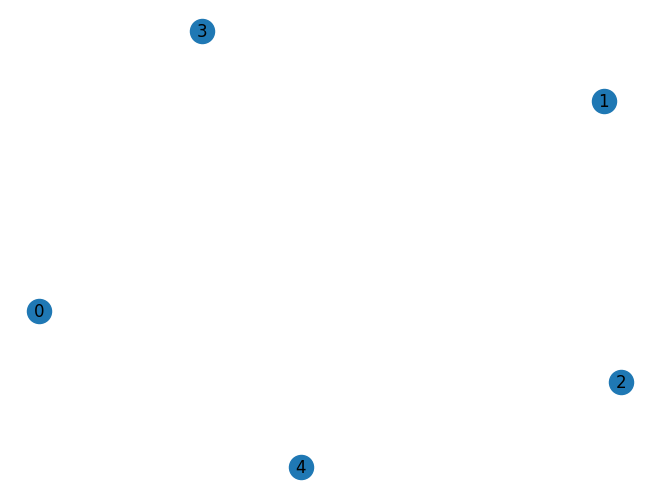

In [ ]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Data mentor
mentor_data = [
    {
        "index": 0,
        "name": "Abdan Zaki Alifian",
        "company": "PT. Bank MNC Internasional, Tbk.",
        "user_headline": "External Code Reviewer at Dicoding Indonesia",
        "occupation": "Android Developer",
        "last_education": "NaN",
        "profile": "Belajar Membuat Aplikasi Android untuk Pemula Belajar Fundamental Aplikasi Flutter Menjadi Android Developer Expert Belajar Fundamental Aplikasi Android Memulai Pemrograman Dengan Kotlin Belajar Pengembangan Aplikasi Android Intermediate Bangkit Graduate 2021 - Android Learning Path Dicoding Graduate - Android Development Android Developer at PT Bank MNC Internasional Tbk. Kotlin Enthusiast"
    },
    {
        "index": 1,
        "name": "Abdul Chathil",
        "company": "University of Muhammadiyah Malang",
        "user_headline": "Mobile Developer at Bhinneka.com",
        "occupation": "Pelajar/Mahasiswa",
        "last_education": "DIPLOMA_IV_OR_STRATA_I",
        "profile": "Associate Android Developer Mobile Enthusiast Dicoding Graduate"
    },
    {
        "index": 2,
        "name": "Abdul Malik",
        "company": "SMK Media Informatika",
        "user_headline": "Self-employed",
        "occupation": "Belum/Tidak Bekerja",
        "last_education": "DIPLOMA_IV_OR_STRATA_I",
        "profile": "A self-taught Frontend Developer with a passion for building user-friendly and efficient websites. My recent learning in Frontend web development has equipped me with a solid foundation in"
    }
]

# Data mentee
mentee_data = [
    {
        "index": 0,
        "name": "hafizhan shidqi",
        "profile": "Belajar Membangun LINE Chatbot"
    },
    {
        "index": 1,
        "name": "gandhi wibowo",
        "profile": "Belajar Membuat Aplikasi Android untuk Pemula Menjadi Azure Cloud Developer Memulai Pemrograman Dengan Swift Belajar Prinsip Pemrograman SOLID"
    },
    {
        "index": 2,
        "name": "aldio mahendra purwandrarto",
        "profile": "Belajar Membuat Augmented Reality"
    },
    {
        "index": 3,
        "name": "benny putra",
        "profile": "Menjadi Azure Cloud Developer"
    },
    {
        "index": 4,
        "name": "vicky vernando dasta",
        "profile": "Belajar Membangun LINE Chatbot Belajar Dasar Pemrograman Web"
    }
]

# Preprocessing data
mentor_profiles = [mentor['profile'] for mentor in mentor_data]
mentee_profiles = [mentee['profile'] for mentee in mentee_data]
corpus = mentor_profiles + mentee_profiles

# Vectorizing the profiles
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Calculate cosine similarity between mentor and mentee profiles
similarity_matrix = cosine_similarity(tfidf_matrix[:-len(mentee_data)], tfidf_matrix[-len(mentee_data):])

# Create a graph to represent mentor-mentee relationships
G = nx.Graph()

# Add mentor nodes to the graph
for mentor in mentor_data:
    G.add_node(mentor['index'], name=mentor['name'], occupation=mentor['occupation'], node_type='mentor')

# Add mentee nodes to the graph
for mentee in mentee_data:
    G.add_node(mentee['index'], name=mentee['name'], node_type='mentee')

# Add edges between mentor and mentee nodes based on similarity score
for i, sim_scores in enumerate(similarity_matrix):
    for j, score in enumerate(sim_scores):
        if score > 0.5:
            G.add_edge(i, len(mentor_data) + j, weight=score)

# Retrieve mentor-mentee matches
matches = []
for mentee in mentee_data:
    mentee_index = mentee['index']
    mentor_indices = [edge[1] - len(mentor_data) for edge in G.edges(mentee_index)]
    mentors = [mentor_data[index] for index in mentor_indices]
    matches.append({'mentee': mentee, 'mentors': mentors})

# Print mentor-mentee matches
for match in matches:
    mentee_name = match['mentee']['name']
    mentor_names = [mentor['name'] for mentor in match['mentors']]
    print(f"Mentee: {mentee_name}")
    print(f"Mentors: {mentor_names}")
    print()

# Visualize the graph (optional)
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
mentor_data

[{'index': 0,
  'name': 'Abdan Zaki Alifian',
  'company': 'PT. Bank MNC Internasional, Tbk.',
  'user_headline': 'External Code Reviewer at Dicoding Indonesia',
  'occupation': 'Android Developer',
  'last_education': 'NaN',
  'profile': 'Belajar Membuat Aplikasi Android untuk Pemula Belajar Fundamental Aplikasi Flutter Menjadi Android Developer Expert Belajar Fundamental Aplikasi Android Memulai Pemrograman Dengan Kotlin Belajar Pengembangan Aplikasi Android Intermediate Bangkit Graduate 2021 - Android Learning Path Dicoding Graduate - Android Development Android Developer at PT Bank MNC Internasional Tbk. Kotlin Enthusiast'},
 {'index': 1,
  'name': 'Abdul Chathil',
  'company': 'University of Muhammadiyah Malang',
  'user_headline': 'Mobile Developer at Bhinneka.com',
  'occupation': 'Pelajar/Mahasiswa',
  'last_education': 'DIPLOMA_IV_OR_STRATA_I',
  'profile': 'Associate Android Developer Mobile Enthusiast Dicoding Graduate'},
 {'index': 2,
  'name': 'Abdul Malik',
  'company': '

In [5]:
import nltk
nltk.download('stopwords')

nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

class Mentee:
    def __init__(self, name, needs):
        self.name = name
        self.needs = needs

class Mentor:
    def __init__(self, name, expertise):
        self.name = name
        self.expertise = expertise

class MentoringPlatform:
    def __init__(self):
        self.mentees = []
        self.mentors = []
        self.vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

    def add_mentee(self, mentee):
        self.mentees.append(mentee)

    def add_mentor(self, mentor):
        self.mentors.append(mentor)

    def preprocess_text(self, text):
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text.lower())
        filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        preprocessed_text = ' '.join(filtered_tokens)
        return preprocessed_text

    def fit_vectorizer(self):
        corpus = []
        for mentee in self.mentees:
            corpus.append(self.preprocess_text(mentee.needs))
        for mentor in self.mentors:
            corpus.append(self.preprocess_text(mentor.expertise))
        self.vectorizer.fit(corpus)

    def find_mentor(self, mentee):
        mentee_needs = self.preprocess_text(mentee.needs)
        mentee_vector = self.vectorizer.transform([mentee_needs])

        matched_mentors = []
        for mentor in self.mentors:
            mentor_expertise = self.preprocess_text(mentor.expertise)
            mentor_vector = self.vectorizer.transform([mentor_expertise])

            similarity_score = cosine_similarity(mentee_vector, mentor_vector)[0][0]
            if similarity_score > 0:
                matched_mentors.append((mentor, similarity_score))

        matched_mentors = sorted(matched_mentors, key=lambda x: x[1], reverse=True)
        return matched_mentors

# Contoh penggunaan:
platform = MentoringPlatform()

# Menambahkan mentees dan mentors ke platform
mentee1 = Mentee("Mentee 1", "Saya ingin mencari mentor yang ahli dalam bidang machine learning")
mentee2 = Mentee("Mentee 2", "Saya butuh bimbingan dalam pengembangan aplikasi web")
platform.add_mentee(mentee1)
platform.add_mentee(mentee2)

mentor1 = Mentor("Mentor 1", "Machine learning adalah spesialisasi saya")
mentor2 = Mentor("Mentor 2", "Saya berpengalaman dalam pengembangan front-end")
mentor3 = Mentor("Mentor 3", "Saya memiliki keahlian dalam analisis data menggunakan Python")
platform.add_mentor(mentor1)
platform.add_mentor(mentor2)
platform.add_mentor(mentor3)

# Fitting vectorizer
platform.fit_vectorizer()

# Melakukan pencocokan mentee dengan mentor
for mentee in platform.mentees:
    matched_mentors = platform.find_mentor(mentee)
    if len(matched_mentors) > 0:
        print(f"Mentee '{mentee.name}' cocok dengan mentor:")
        for mentor, similarity_score in matched_mentors:
            print(f"- {mentor.name} ({mentor.expertise}) - Similarity Score: {similarity_score}")
    else:
        print(f"Mentee '{mentee.name}' tidak ditemukan mentor yang cocok.")


Mentee 'Mentee 1' cocok dengan mentor:
- Mentor 1 (Machine learning adalah spesialisasi saya) - Similarity Score: 0.2905526963458683
- Mentor 2 (Saya berpengalaman dalam pengembangan front-end) - Similarity Score: 0.131182964049082
- Mentor 3 (Saya memiliki keahlian dalam analisis data menggunakan Python) - Similarity Score: 0.07597921717367676
Mentee 'Mentee 2' cocok dengan mentor:
- Mentor 2 (Saya berpengalaman dalam pengembangan front-end) - Similarity Score: 0.3539492466503359
- Mentor 3 (Saya memiliki keahlian dalam analisis data menggunakan Python) - Similarity Score: 0.09337241587159228
- Mentor 1 (Machine learning adalah spesialisasi saya) - Similarity Score: 0.05302835625052723
